# This is project is to predict the wellhead pressure and flow pattern within the well

![shale well](img/shallwellimg.jpg)

### Import modules

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn import preprocessing

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

%matplotlib inline

### Read raw data

In [2]:
df=pd.read_csv('well_2520data_v1.csv')


In [3]:
df.head()

,Date,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1/1/2020,1.997999,466.86395,4320.80866,5603.811198,0.080394,0.799680,0.839809,396646.0544,0.513819,2.540583,0.013141,0.273806,4,2150.835786,211.852508
1,1/2/2020,2.000979,462.75264,3177.54154,5574.183600,0.079922,0.629477,0.811463,312421.2874,0.491906,1.980774,0.011881,0.276766,4,2284.109281,207.602074
2,1/3/2020,1.998964,448.63094,2587.33434,5547.496275,0.080651,0.537949,0.788673,268611.3109,0.484539,1.681916,0.011080,0.279040,4,2371.590019,204.256007
3,1/4/2020,1.985018,444.05424,2207.89845,5532.051609,0.079546,0.481507,0.775623,238882.5679,0.467621,1.496468,0.010385,0.281000,4,2439.152773,201.442625
4,1/5/2020,1.986000,428.11200,1983.00000,5525.004375,0.081171,0.443607,0.759974,221882.4547,0.469368,1.372262,0.009937,0.282733,4,2494.398480,199.322796


In [4]:
df.drop(columns='Date', inplace=True)

In [5]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FlowPatternGasLiquid6,FINAPRESS,FINATEMP
0,1.997999,466.86395,4320.80866,5603.811198,0.080394,0.799680,0.839809,396646.0544,0.513819,2.540583,0.013141,0.273806,4,2150.835786,211.852508
1,2.000979,462.75264,3177.54154,5574.183600,0.079922,0.629477,0.811463,312421.2874,0.491906,1.980774,0.011881,0.276766,4,2284.109281,207.602074
2,1.998964,448.63094,2587.33434,5547.496275,0.080651,0.537949,0.788673,268611.3109,0.484539,1.681916,0.011080,0.279040,4,2371.590019,204.256007
3,1.985018,444.05424,2207.89845,5532.051609,0.079546,0.481507,0.775623,238882.5679,0.467621,1.496468,0.010385,0.281000,4,2439.152773,201.442625
4,1.986000,428.11200,1983.00000,5525.004375,0.081171,0.443607,0.759974,221882.4547,0.469368,1.372262,0.009937,0.282733,4,2494.398480,199.322796


In [6]:
df['FlowPatternGasLiquid6'].nunique()

2

zero hot encoding

In [7]:
df2=pd.get_dummies(df['FlowPatternGasLiquid6'],prefix='FlowPattern')

In [8]:
df2.head()

,FlowPattern_3,FlowPattern_4
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [9]:
df=pd.concat([df,df2],axis=1)

In [10]:
df.drop(columns='FlowPatternGasLiquid6', inplace=True)

In [11]:
df.head()

,Gas Flow_MMSCFD,Oil_bpd,Water_bpd,FWHP_psig,FroudeNumberGas6,FroudeNumberLiquid6,HoldupFractionLiquid6,ReynoldsNumber6,SuperficialVelocityGas6,SuperficialVelocityLiquid6,SurfaceTensionLiquidInSitu6,ViscosityLiquidInSitu6,FINAPRESS,FINATEMP,FlowPattern_3,FlowPattern_4
0,1.997999,466.86395,4320.80866,5603.811198,0.080394,0.799680,0.839809,396646.0544,0.513819,2.540583,0.013141,0.273806,2150.835786,211.852508,0,1
1,2.000979,462.75264,3177.54154,5574.183600,0.079922,0.629477,0.811463,312421.2874,0.491906,1.980774,0.011881,0.276766,2284.109281,207.602074,0,1
2,1.998964,448.63094,2587.33434,5547.496275,0.080651,0.537949,0.788673,268611.3109,0.484539,1.681916,0.011080,0.279040,2371.590019,204.256007,0,1
3,1.985018,444.05424,2207.89845,5532.051609,0.079546,0.481507,0.775623,238882.5679,0.467621,1.496468,0.010385,0.281000,2439.152773,201.442625,0,1
4,1.986000,428.11200,1983.00000,5525.004375,0.081171,0.443607,0.759974,221882.4547,0.469368,1.372262,0.009937,0.282733,2494.398480,199.322796,0,1


In [12]:
y_pre=df['FINAPRESS']
X_pre=df.drop(columns=['FINAPRESS','FINATEMP'], axis=1)

In [13]:
y_hol=df['HoldupFractionLiquid6']
X_hol=df.drop(columns=['HoldupFractionLiquid6','FINATEMP'], axis=1)

In [14]:
y_pat=df[['FlowPattern_3','FlowPattern_4']]
X_pat=df.drop(columns=['FlowPattern_3','FlowPattern_4','FINATEMP'], axis=1)

### Plot four sets of data 

In [15]:
def four_y_plot(paraa, labela, parab, labelb, parac, labelc, parad, labeld, labelx, title):
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)
    
    fig, host = plt.subplots(figsize=(10, 8))
    fig.subplots_adjust(right=1)
    
    par1 = host.twinx()
    par2 = host.twinx()
    par3 = host.twinx()

    # Offset the right spine of par2.  The ticks and label have already been
    # placed on the right by twinx above.
    par2.spines["right"].set_position(("axes", 1.1))
    par3.spines["right"].set_position(("axes", 1.2))
    # Having been created by twinx, par2 has its frame off, so the line of its
    # detached spine is invisible.  First, activate the frame but make the patch
    # and spines invisible.
    make_patch_spines_invisible(par2)
    make_patch_spines_invisible(par3)
    # Second, show the right spine.
    par2.spines["right"].set_visible(True)
    par3.spines["right"].set_visible(True)
    
    p1, = host.plot(paraa, "b-", label=labela)
    p2, = par1.plot(parab, "r-", label=labelb)
    p3, = par2.plot(parac, "g-", label=labelc)
    p4, = par3.plot(parad, "black", label=labeld)
    
    # host.set_xlim(0, 250)
    # host.set_ylim(0, 2.2)
    # par1.set_ylim(0, 500)
    # par2.set_ylim(1, 5000)
    # par3.set_ylim(1, 6000)
    
    host.set_xlabel(labelx, fontsize=14)
    host.set_ylabel(labela, fontsize=14)
    par1.set_ylabel(labelb, fontsize=14)
    par2.set_ylabel(labelc, fontsize=14)
    par3.set_ylabel(labeld, fontsize=14)
    
    host.yaxis.label.set_color(p1.get_color())
    par1.yaxis.label.set_color(p2.get_color())
    par2.yaxis.label.set_color(p3.get_color())
    par3.yaxis.label.set_color(p4.get_color())
    
    tkw = dict(size=4, width=1.5)
    host.tick_params(axis='y', colors=p1.get_color(), labelsize=12)
    par1.tick_params(axis='y', colors=p2.get_color(), labelsize=12)
    par2.tick_params(axis='y', colors=p3.get_color(), labelsize=12)
    par3.tick_params(axis='y', colors=p4.get_color(), labelsize=12)
    host.tick_params(axis='x', labelsize=14)
    
    lines = [p1, p2, p3, p4]
    
    host.legend(lines, [l.get_label() for l in lines], fontsize=14)
    plt.title(title, fontsize=16)
    
    plt.show()

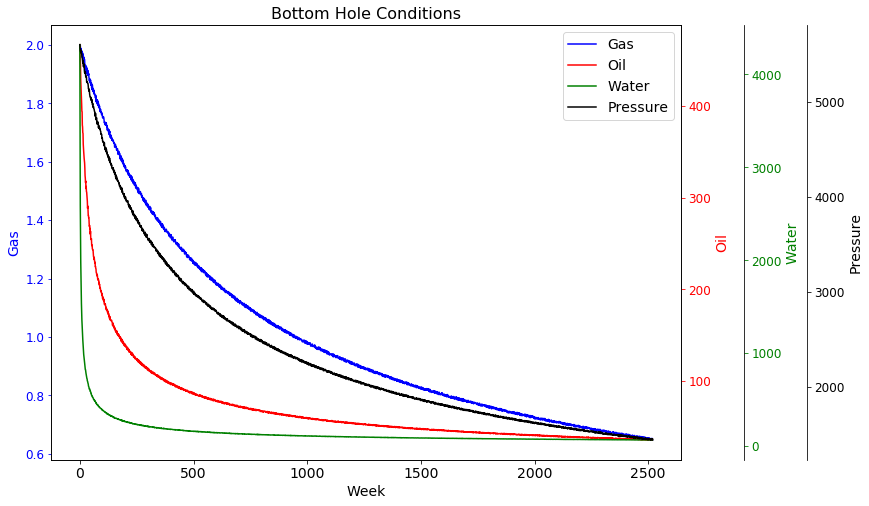

In [16]:
four_y_plot(df['Gas Flow_MMSCFD'], "Gas",
            df['Oil_bpd'], "Oil", 
            df['Water_bpd'],"Water",
            df['FWHP_psig'], "Pressure",
            "Week",
            "Bottom Hole Conditions")

Prepare train and test data

In [17]:
X_pre= preprocessing.StandardScaler().fit(X_pre).transform(X_pre)
X_pre[0:5]
X_hol= preprocessing.StandardScaler().fit(X_hol).transform(X_hol)
X_hol[0:5]

array([[ 3.08034778,  7.41251108, 22.74044591,  3.52936387,  0.71204048,
        17.23520473, 17.57055256, -1.33344928, 18.0991947 , -1.29536628,
        -2.24718977,  1.86092738, -3.29104633,  3.29104633],
       [ 3.08953373,  7.33546142, 16.52021914,  3.49722259,  0.64370644,
        13.37361027, 13.19650185, -1.41732485, 13.89191119, -1.43975185,
        -2.22837368,  2.04598629, -3.29104633,  3.29104633],
       [ 3.08332346,  7.07080803, 13.30905129,  3.46827104,  0.74919954,
        11.29701269, 10.92131528, -1.44552037, 11.6458161 , -1.53154325,
        -2.21392258,  2.16745897, -3.29104633,  3.29104633],
       [ 3.04034166,  6.98503655, 11.24463673,  3.45151601,  0.58916243,
        10.01644644,  9.37741039, -1.51027583, 10.25206396, -1.61115899,
        -2.20146995,  2.26127424, -3.29104633,  3.29104633],
       [ 3.0433682 ,  6.6862646 , 10.02102124,  3.44387087,  0.82458307,
         9.15657978,  8.49454233, -1.50359058,  9.3185838 , -1.6624754 ,
        -2.19045649,  2.33

Split train data and test data by 0.8/0.2

In [21]:
X_train=X_pre[0:2016]
y_train=y_pre[0:2016]
X_test=X_pre[2016:]
y_test=y_pre[2016:]
# hold up data
X_hol_train=X_hol[0:2016]
y_hol_train=y_hol[0:2016]
X_hol_test=X_hol[2016:]
y_hol_test=y_hol[2016:]

In [19]:
'''
# random split train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_pre[0:182],y_pre[0:182], test_size=0.05,random_state=21)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
y_test.shape[0]
'''

"\n# random split train and test\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split( X_pre[0:182],y_pre[0:182], test_size=0.05,random_state=21)\nprint ('Train set:', X_train.shape,  y_train.shape)\nprint ('Test set:', X_test.shape,  y_test.shape)\ny_test.shape[0]\n"

# *SVM*

In [20]:
from sklearn import svm
from sklearn import metrics
from sklearn import model_selection



## Hyperparameter tuning

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.
C_range = 10. ** np.arange(-1, 5)
gamma_range = 10. ** np.arange(-1, 2)
param_grid = dict(gamma=gamma_range, C=C_range)

X=X_train
y=y_train

grid = GridSearchCV(svm.SVR(kernel='rbf'), param_grid=param_grid, refit=True, verbose=3)
grid.fit(X, y)
print("The best classifier is: ", grid.best_estimator_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................. C=0.1, gamma=0.1, score=-19.881, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] .................. C=0.1, gamma=0.1, score=-10.046, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=-2.562, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[CV] .................. C=0.1, gamma=0.1, score=-53.720, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................. C=0.1, gamma=0.1, score=-300.695, to

Set the models

In [103]:
'''
# Parameters for best fit
svr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.0029, epsilon=0.1)
svr_lin = svm.SVR(kernel='linear', C=18, gamma=0.01, epsilon=0.1)
svr_poly = svm.SVR(kernel='poly',gamma=1, degree=3, epsilon=.1,
               coef0=1)

clf=svr_poly.fit(X_train, y_train)
print(clf.score(X_test,y_test))

'''
# print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_hat))

0.9511294851312608


In [105]:
# Parameters 
svr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.0029, epsilon=0.1)
svr_lin = svm.SVR(kernel='linear', C=18, gamma=0.01, epsilon=0.1)
svr_poly = svm.SVR(kernel='poly',gamma=1, degree=3, epsilon=.1,
               coef0=3)

clf=svr_poly.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.9996206938709765


In [31]:
def cross_valuations(svr_, Xdata, ydata, nsplit, s1, l1, s2, l2, s3, l3):
    
    kfold = model_selection.KFold(n_splits=nsplit, random_state=21, shuffle=True)
    
    scores = [s1, s2, s3]
    labels = [l1, l2, l3]
    
    for ix, score in enumerate(scores):
        results = model_selection.cross_val_score(svr_, Xdata, ydata, cv=kfold, scoring=scores[ix])
        print("SVR", svr_.kernel,labels[ix],format(results.mean(),'.4f'), format(results.std(),'.4f'))
    print('\n')   
    
   

Evaluate different algorithms

In [551]:
'''
svrs = [svr_rbf, svr_lin, svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_train,
                 y_train,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )
'''

'\nsvrs = [svr_rbf, svr_lin, svr_poly]\nfor i in range(len(svrs)):\n    cross_valuations(svrs[i],\n                 X_train,\n                 y_train,\n                 7,\n                 "neg_mean_absolute_error", "MAE:",\n                 "neg_root_mean_squared_error", "RMSE:",\n                 "r2", "R^2:"\n                 )\n'

In [33]:
def three_svr_plot(svr1, label1, svr2, label2, svr3, label3, trainx, trainy, testx, testy, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    svrs = [svr1, svr2, svr3]
    kernel_label = [label1, label2, label3]
    model_color = ['b', 'c', 'g']
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 12), sharey=True)
    for ix, svr in enumerate(svrs):
        y_hat=svr.fit(trainx, trainy).predict(testx)
        
        MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
        MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
        R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
        axes[ix].plot(y_hat, color=model_color[ix], lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(kernel_label[ix], MAE, R2))
        axes[ix].plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
        axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                        ncol=1, fancybox=False, shadow=False, fontsize=14)
    fig.text(0.5, 0.04, labelx, ha='center', va='center', fontsize=12)
    fig.text(0.06, 0.5, labely, ha='center', va='center', rotation='vertical', fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

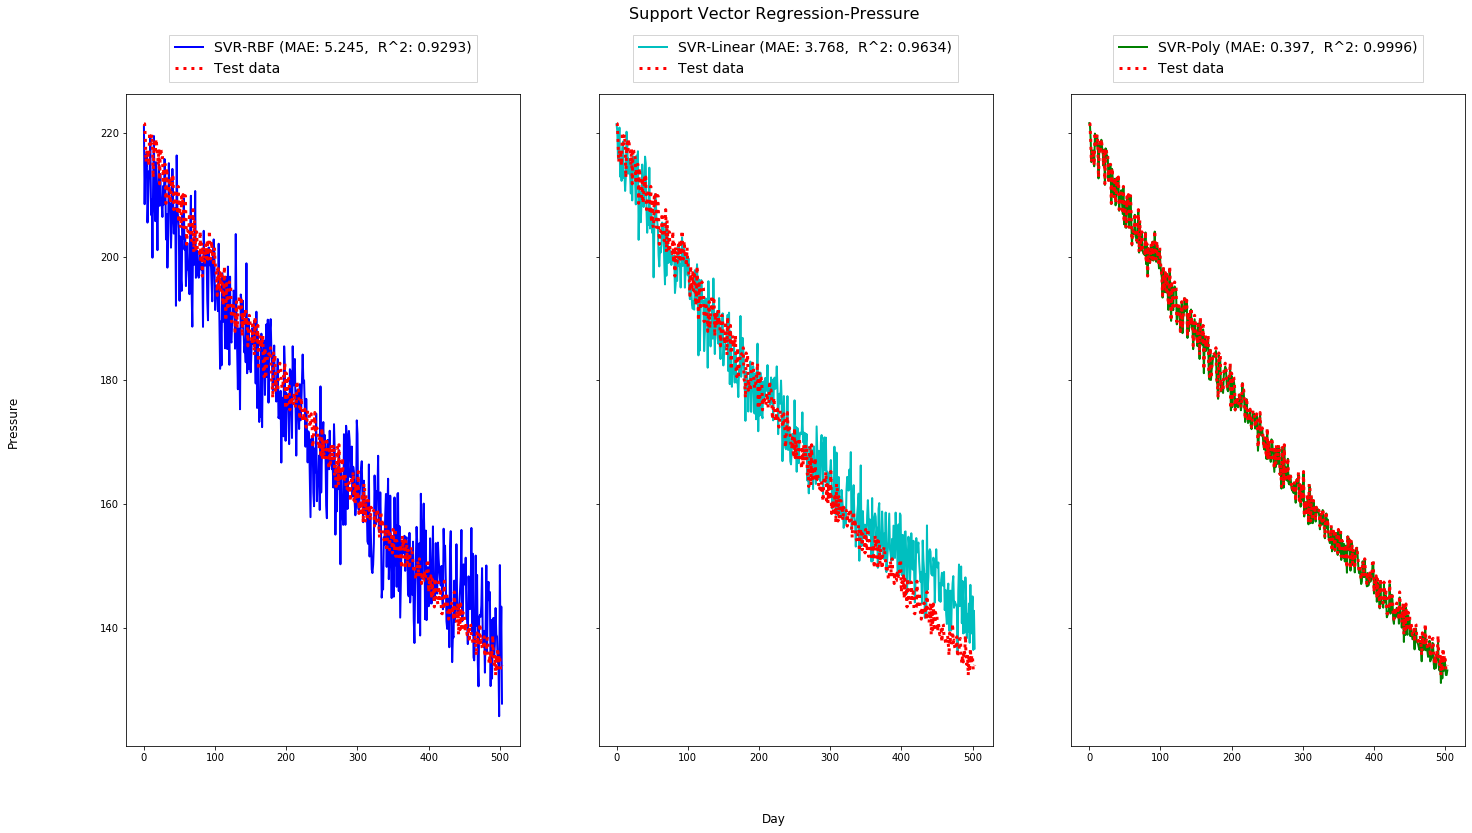

In [106]:
three_svr_plot(svr_rbf, "SVR-RBF",
               svr_lin, "SVR-Linear",
               svr_poly, "SVR-Poly",
               X_train,
               y_train,
               X_test,
               y_test,
               "Day",
               "Pressure",
               "Support Vector Regression-Pressure")

## Predict Holdup

In [142]:
hol_svr_rbf = svm.SVR(kernel='rbf', C=20, gamma=0.001, epsilon=0.0001)
hol_svr_lin = svm.SVR(kernel='linear', C=1, gamma=0.006, epsilon=0.0001)
hol_svr_poly = svm.SVR(kernel='poly',gamma=0.01, degree=2, epsilon=.00001,
               coef0=0.3)


clf2=hol_svr_poly.fit(X_hol_train, y_hol_train)
print(clf2.score(X_hol_test,y_hol_test))

0.9845689592782063


In [40]:

svrs = [hol_svr_rbf, hol_svr_lin, hol_svr_poly]
for i in range(len(svrs)):
    cross_valuations(svrs[i],
                 X_hol_train,
                 y_hol_train,
                 10,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )


SVR rbf MAE: -0.0029 0.0011
SVR rbf RMSE: -0.0059 0.0022
SVR rbf R^2: 0.9936 0.0111


SVR linear MAE: -0.0021 0.0007
SVR linear RMSE: -0.0041 0.0017
SVR linear R^2: 0.9965 0.0067


SVR poly MAE: -0.0003 0.0001
SVR poly RMSE: -0.0005 0.0002
SVR poly R^2: 1.0000 0.0001




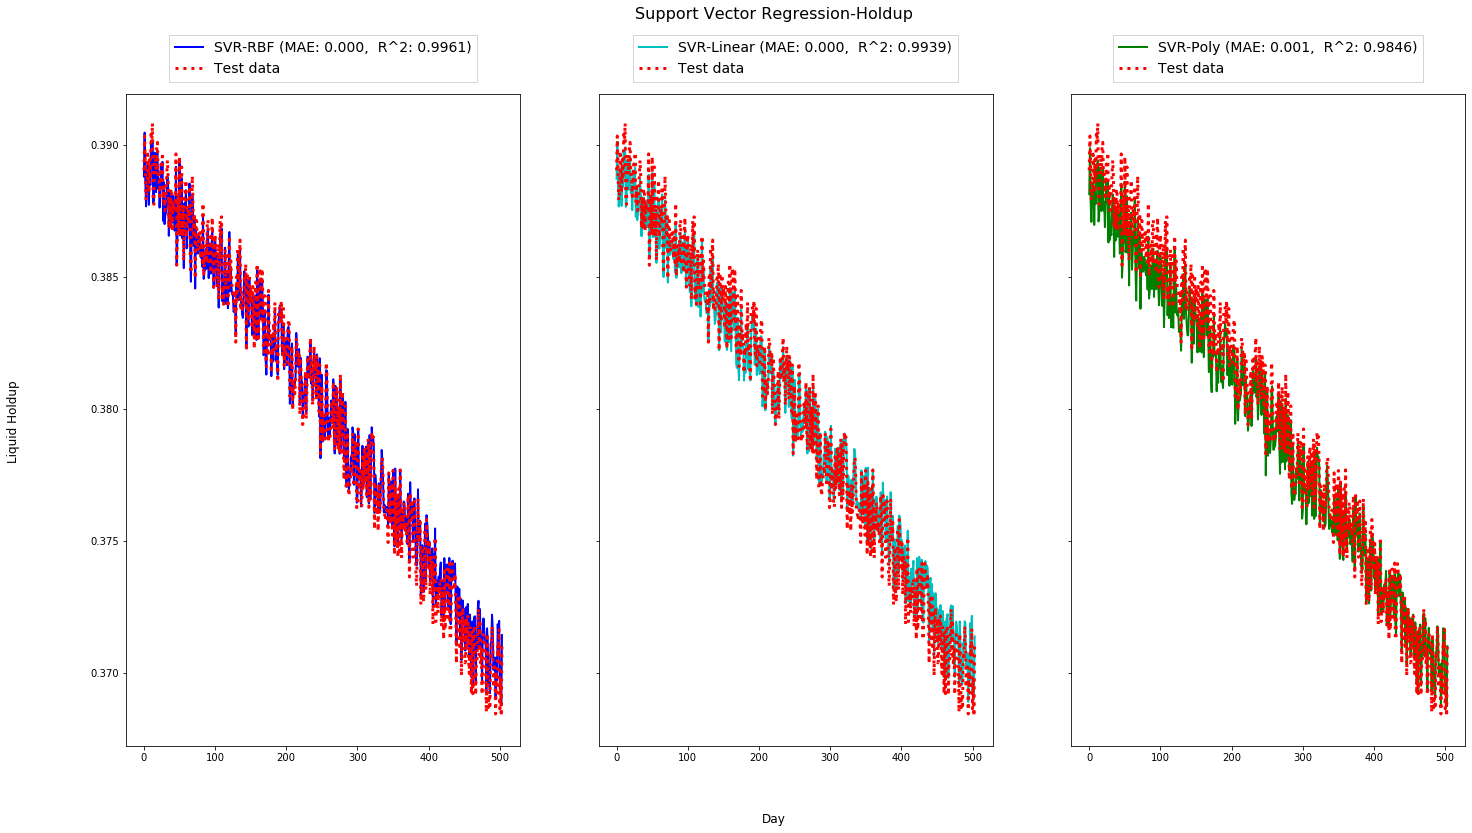

In [144]:
three_svr_plot(hol_svr_rbf, "SVR-RBF",
               hol_svr_lin, "SVR-Linear",
               hol_svr_poly, "SVR-Poly",
               X_hol_train,
               y_hol_train,
               X_hol_test,
               y_hol_test,
               "Day",
               "Liquid Holdup",
               "Support Vector Regression-Holdup")

In [145]:
def comp_plot(ml1, label1, trainx, trainy, testx, testy, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    fig= plt.figure(figsize=(12, 10))
   
    y_hat=ml1.fit(trainx, trainy).predict(testx)
        
    MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
    MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
    R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
    plt.plot(y_hat, color='blue', lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(label1, MAE, R2))
    plt.plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.1),fontsize=12)
    plt.xlabel(labelx, fontsize=12)
    plt.ylabel(labely, fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

## Model evaluation modules

In [146]:
# model evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

## Ridge, Lasso, Linear Regression

In [147]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor



In [256]:


rreg = Ridge(alpha=1)
lareg= Lasso(alpha=15)
linreg=LinearRegression()
sgdreg=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False)



kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(rreg, X_train, y_train, cv=kfold)
print("Cross Val Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


sgdreg.fit(X_train, y_train)
y_pred =sgdreg.predict(X_test)

MAE=format(metrics.mean_absolute_error(y_test, y_pred),'.3f')
MSE=format(metrics.mean_squared_error(y_test, y_pred),'.2f')
R2=format(metrics.r2_score(y_test, y_pred),'.4f')       


print('RMSE: %.4f' % lin_rmse)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:',  R2)

Cross Val Accuracy: 99.99% (0.01%)
RMSE: 26.2046
MAE: 16.121
MSE: 310.35
R2: 0.4952


In [48]:
type(y_pred)

numpy.ndarray

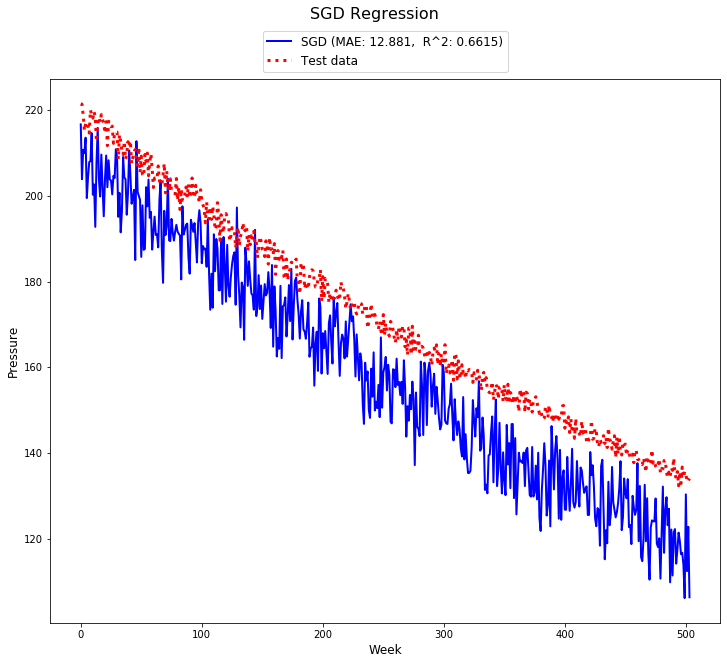

In [262]:
comp_plot(sgdreg, "SGD",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "SGD Regression")

In [217]:
def cross_valuations2(svr_, Xdata, ydata, nsplit, s1, l1, s2, l2, s3, l3):
    
    kfold = model_selection.KFold(n_splits=nsplit, random_state=21, shuffle=True)
    
    scores = [s1, s2, s3]
    labels = [l1, l2, l3]
    
    for ix, score in enumerate(scores):
        results = model_selection.cross_val_score(svr_, Xdata, ydata, cv=kfold, scoring=scores[ix])
        print(str(svr_)[0:5],labels[ix],format(results.mean(),'.4f'), format(results.std(),'.4f'))
    print('\n')   
    

In [249]:
linregs = [rreg, lareg, linreg]
for i in range(len(linregs)):
    cross_valuations2(linregs[i],
                 X_train,
                 y_train,
                 7,
                 "neg_mean_absolute_error", "MAE:",
                 "neg_root_mean_squared_error", "RMSE:",
                 "r2", "R^2:"
                 )

Ridge MAE: -5.6867 0.3920
Ridge RMSE: -8.4514 2.2724
Ridge R^2: 0.9999 0.0001


Lasso MAE: -20.6992 1.3017
Lasso RMSE: -27.3509 4.0347
Lasso R^2: 0.9985 0.0005


Linea MAE: -1.9460 0.1695
Linea RMSE: -3.5521 1.9186
Linea R^2: 1.0000 0.0000




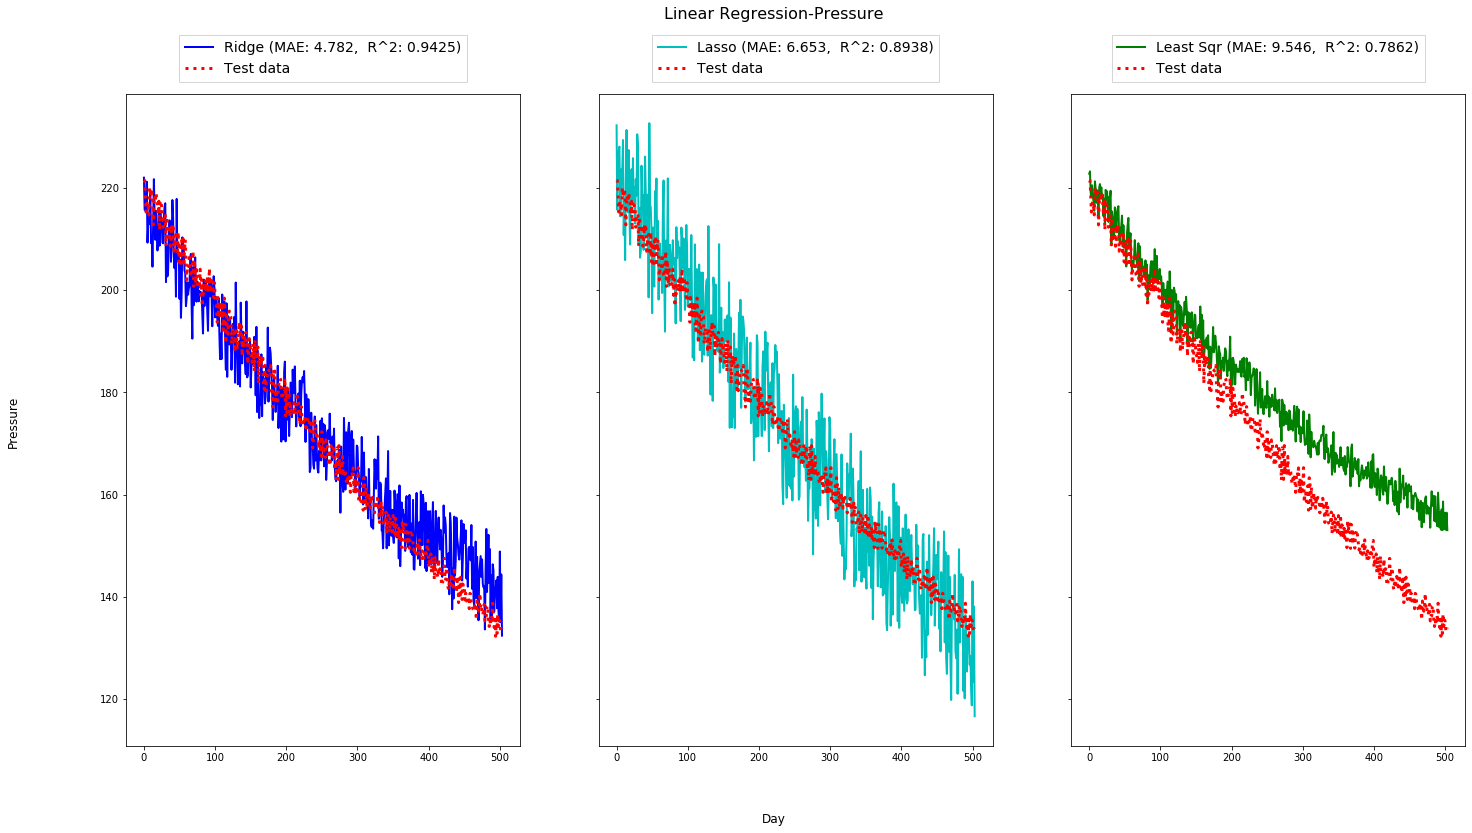

In [252]:
three_svr_plot(rreg, "Ridge",
               lareg, "Lasso",
               linreg, "Least Sqr",
               X_train,
               y_train,
               X_test,
               y_test,
               "Day",
               "Pressure",
               "Linear Regression-Pressure")

## Grid search parameter

In [253]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0.00001])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.9557372437487348
0.001


## Random search paramter

In [254]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
# load the diabetes datasets

param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_test, y_test)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026312ED6FC8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)
0.7755972383706802
0.005212401027978708


## SGD Regression

In [255]:
alphas = np.array([0.1,1,2,5,10,100,1000,10000])
l1_ratios=np.array([0,0.2,0.5,0.7,1])
epsilons=np.array([0.1,0.01,0.001])
power_ts=np.array([0.1,0.25,0.5,1,2])

params=dict(alpha=alphas)

# create and fit a ridge regression model, testing each alpha
model = SGDRegressor()
grid = GridSearchCV(estimator=model, param_grid=params)
grid.fit(X_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.e-01, 1.e+00, 2.e+00, 5.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.723017076181

In [56]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand
# load the diabetes datasets
'''
param_grid = {'alpha': sp_rand()}
# create and fit a ridge regression model, testing random alpha values
model = SGDRegressor()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(X_test, y_test)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)
'''

"\nparam_grid = {'alpha': sp_rand()}\n# create and fit a ridge regression model, testing random alpha values\nmodel = SGDRegressor()\nrsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)\nrsearch.fit(X_test, y_test)\nprint(rsearch)\n# summarize the results of the random parameter search\nprint(rsearch.best_score_)\nprint(rsearch.best_estimator_.alpha)\n"

# Gradient Boost

In [270]:
from sklearn.ensemble import GradientBoostingRegressor



params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbrt= GradientBoostingRegressor(**params)


kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(gbrt, X_train, y_train, cv=kfold)
print("Cross Val Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


gbrt.fit(X_train, y_train)
y_pred = gbrt.predict(X_test)

MAE=format(metrics.mean_absolute_error(y_test, y_pred),'.3f')
MSE=format(metrics.mean_squared_error(y_test, y_pred),'.2f')
R2=format(metrics.r2_score(y_test, y_pred),'.4f')       

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: %.4f' % lin_rmse)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:',  R2)


Cross Val Accuracy: 99.99% (0.01%)
RMSE: 53.3024
MAE: 46.898
MSE: 2841.15
R2: -3.6217


## GB

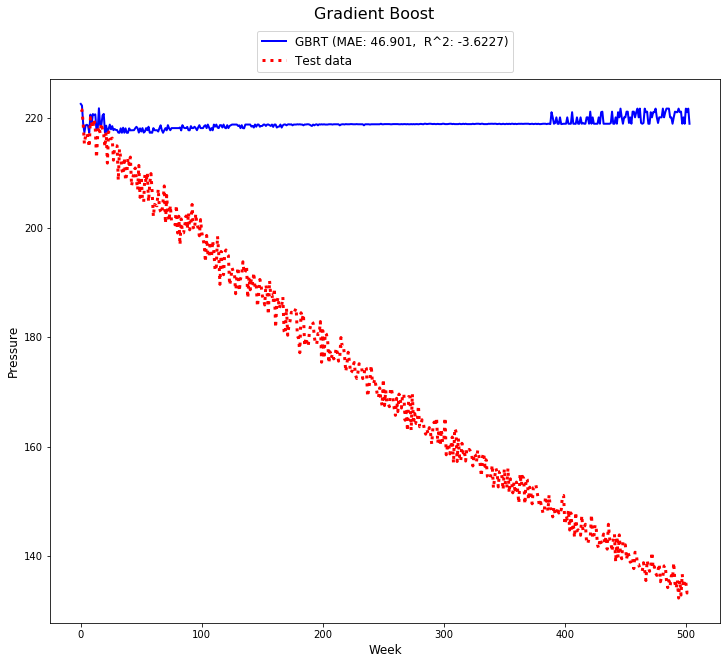

In [271]:
comp_plot(gbrt, "GBRT",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "Gradient Boost")

# Random Forest

In [272]:
from sklearn.ensemble import RandomForestRegressor

In [275]:
params = {'n_estimators': 100, 'max_depth': 30, 'random_state': 0,}

RFR = RandomForestRegressor(**params)

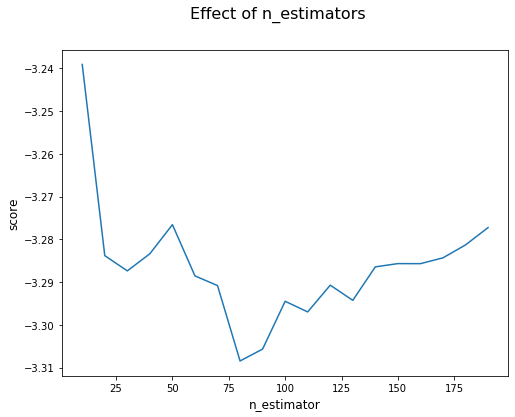

In [274]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    RFR.set_params(n_estimators=n)
    RFR.fit(X_train, y_train)
    scores.append(RFR.score(X_test, y_test))
fig= plt.figure(figsize=(8, 6))
plt.xlabel("n_estimator",fontsize=12)
plt.ylabel("score",fontsize=12)
fig.suptitle("Effect of n_estimators", fontsize=16)
plt.plot(estimators, scores)
plt.show()

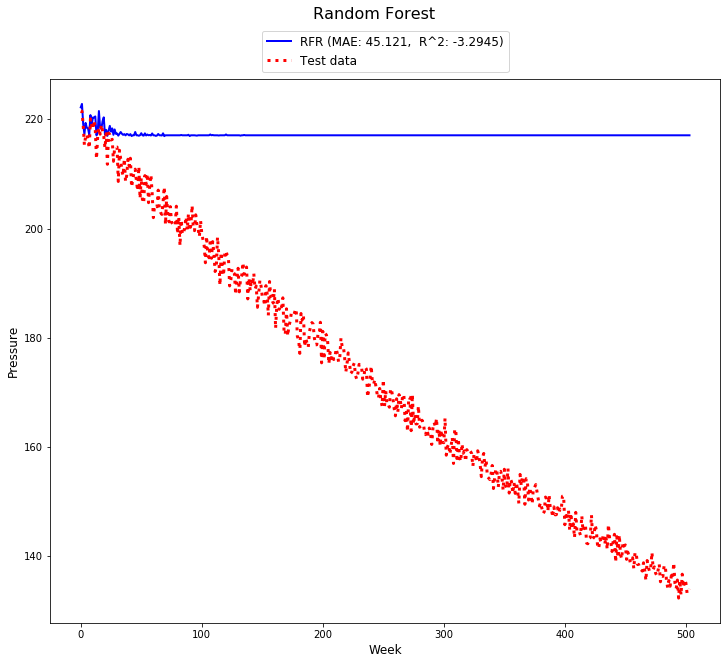

In [276]:
comp_plot(RFR, "RFR",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "Random Forest")

# XGBoost

In [277]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

In [278]:
params={'colsample_bytree': 0.7587948587257435, 'gamma': 0.022613644455269033, 'learning_rate': 0.1275990992289793, 'max_depth': 5, 'n_estimators': 144, 'subsample': 0.7085396127095583}

xgbr = xgb.XGBRegressor(**params)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

MAE=format(metrics.mean_absolute_error(y_test, y_pred),'.3f')
MSE=format(metrics.mean_squared_error(y_test, y_pred),'.2f')
R2=format(metrics.r2_score(y_test, y_pred),'.4f')       

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('RMSE: %.4f' % lin_rmse)
print('MAE:', MAE)
print('MSE:', MSE)
print('R2:',  R2)

C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
[10:36:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 53.5221
MAE: 47.313
MSE: 2864.61
R2: -3.6599


C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
[10:36:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


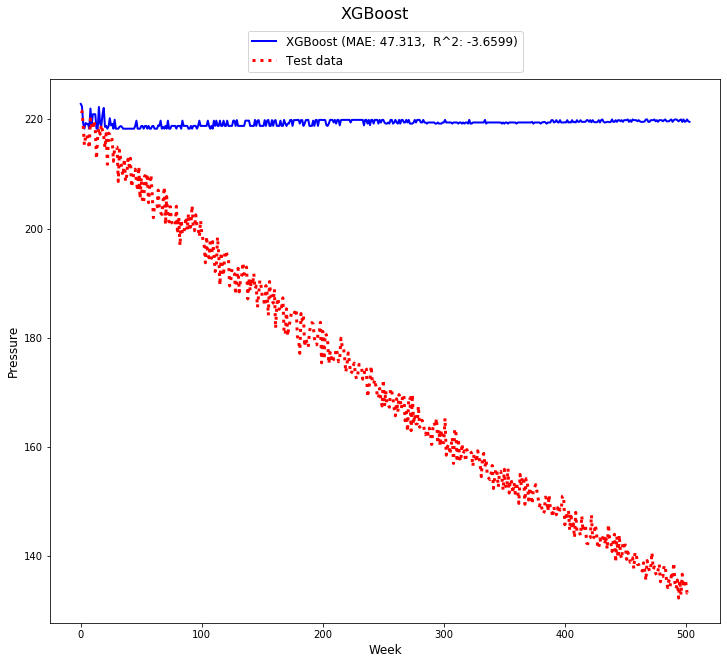

In [279]:
comp_plot(xgbr, "XGBoost",
          X_train,
          y_train,
          X_test,
          y_test,
          "Week",
          "Pressure",
          "XGBoost")

In [280]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [281]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [282]:
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\xuesong.wang1\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
[10:37:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
53.52208607991592


Hyperparameter tuning

In [283]:
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

xgb_model = xgb.XGBRegressor()
'''
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X_train, y_train)

report_best_scores(search.cv_results_, 1)
'''

'\nparams = {\n    "colsample_bytree": uniform(0.7, 0.3),\n    "gamma": uniform(0, 0.5),\n    "learning_rate": uniform(0.03, 0.3), # default 0.1 \n    "max_depth": randint(2, 6), # default 3\n    "n_estimators": randint(100, 150), # default 100\n    "subsample": uniform(0.6, 0.4)\n}\n\nsearch = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)\n\nsearch.fit(X_train, y_train)\n\nreport_best_scores(search.cv_results_, 1)\n'

# Deep Learning

## Deep Neural Netowrk

In [565]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from keras.callbacks import EarlyStopping

import seaborn as sb

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [552]:

'''
# saved network config
NN_model = Sequential()
NN_model.add(Dense(256,input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(256,activation='relu'))

NN_model.add(Dense(1,activation='relu'))
'''

"\n# saved network config\nNN_model = Sequential()\nNN_model.add(Dense(256,input_dim = X_train.shape[1], activation='relu'))\nNN_model.add(Dense(256,activation='relu'))\n\nNN_model.add(Dense(1,activation='relu'))\n"

In [588]:
NN_model = Sequential()
NN_model.add(Dense(256,input_dim = X_train.shape[1], activation='relu'))
NN_model.add(Dense(256,activation='relu'))
# NN_model.add(Dropout(0.2))
NN_model.add(Dense(1,activation='relu'))

In [589]:
optimizer1=tf.keras.optimizers.Adam(0.001)
optimizer2=tf.keras.optimizers.RMSprop(0.001)
optimizer2=optimizer2

NN_model.compile(loss='mse', optimizer=optimizer2, metrics=['mean_absolute_error'])
# NN_model.summary()

In [590]:

# checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint_name = 'NNbestmodel.h5' 
mcp = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [591]:
NN_model.fit(X_train, y_train, epochs=200, batch_size=100, validation_split = 0.2, callbacks=[mcp])

loss did not improve from 261.82149
Epoch 915/1000
1612/1612 [==============================] - 0s 35us/step - loss: 209.4919 - mean_absolute_error: 6.7963 - val_loss: 8183.7931 - val_mean_absolute_error: 78.4132

Epoch 00915: val_loss did not improve from 261.82149
Epoch 916/1000
1612/1612 [==============================] - 0s 33us/step - loss: 146.7267 - mean_absolute_error: 6.4997 - val_loss: 8567.8727 - val_mean_absolute_error: 80.8096

Epoch 00916: val_loss did not improve from 261.82149
Epoch 917/1000
1612/1612 [==============================] - 0s 26us/step - loss: 179.5950 - mean_absolute_error: 7.4819 - val_loss: 8062.1108 - val_mean_absolute_error: 77.7676

Epoch 00917: val_loss did not improve from 261.82149
Epoch 918/1000
1612/1612 [==============================] - 0s 29us/step - loss: 238.5903 - mean_absolute_error: 8.6591 - val_loss: 8274.4480 - val_mean_absolute_error: 79.0115

Epoch 00918: val_loss did not improve from 261.82149
Epoch 919/1000
1612/1612 [==============

## Loop to find better weights.

In [592]:
'''
for i in range(50):
    NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=[mcp, es])
    predictions = NN_model.predict(X_noisetest0)
    ss=metrics.r2_score(y_test, predictions)
    if ss>0.95 :
        print('0.95 scored! after loop:', i)
        break

'''

"\nfor i in range(50):\n    NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=[mcp, es])\n    predictions = NN_model.predict(X_noisetest0)\n    ss=metrics.r2_score(y_test, predictions)\n    if ss>0.95 :\n        print('0.95 scored! after loop:', i)\n        break\n\n"

In [599]:
# Load wights file of the best model :

wights_file = 'NNbestmodel_save.h5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer=optimizer2, metrics=['mean_absolute_error'])


In [600]:
predictions = NN_model.predict(X_test)

In [601]:
metrics.r2_score(y_test, predictions)

0.9606381970316892

In [602]:
def NN_comp_plot(dnn, testy, pred, labelx, labely, ftitle):
    # Look at the results
    lw = 2
    
    fig= plt.figure(figsize=(12, 10))
   
    y_hat=predictions
        
    MAE=format(metrics.mean_absolute_error(testy, y_hat),'.3f')
    MSE=format(metrics.mean_squared_error(testy, y_hat),'.2f')
    R2=format(metrics.r2_score(testy, y_hat),'.4f')        
        
    plt.plot(y_hat, color='blue', lw=lw,
                      label='{} (MAE: {},  R^2: {})'.format(dnn, MAE, R2))
    plt.plot(testy.reset_index(drop=True), color='red', linestyle=':', lw=3,
                      label='Test data')                    
    plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.1),fontsize=12)
    plt.xlabel(labelx, fontsize=12)
    plt.ylabel(labely, fontsize=12)
    fig.suptitle(ftitle, fontsize=16)
    plt.show()

In [603]:
NN_comp_plot("DNN",
             y_test,
             predictions,
             "Week",
             "Pressure",
             "Deep Learning")

In [0]:
metrics.r2_score(y_test, predictions)